In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [143]:
# 데이터 로드
def load_data():
    url = 'http://43.202.66.118:8077/all'
    r = requests.get(url)
    d = r.json()

    return d

In [144]:
# 데이터 가져오기
data = load_data()

In [145]:
# 데이터 프레임 생성
df = pd.DataFrame(data)

df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05
...,...,...,...,...,...,...,...,...,...
299,303,1.jpeg,1,/home/ubuntu/images/n23/635c0ffe-838b-4d77-927...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:47
300,304,1.jpeg,1,/home/ubuntu/images/n23/a1a38ed5-6e5c-45cd-958...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:54
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29


In [146]:
# request_time 컬럼을 datetime 형식으로 변환
df['request_time'] = pd.to_datetime(df['request_time'])
#df['prediction_time'] =pd.to_datetime(df['prediction_time'])
df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05
...,...,...,...,...,...,...,...,...,...
299,303,1.jpeg,1,/home/ubuntu/images/n23/635c0ffe-838b-4d77-927...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:47
300,304,1.jpeg,1,/home/ubuntu/images/n23/a1a38ed5-6e5c-45cd-958...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:54
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29


In [147]:
# 시간별 그룹화를 위해 'request_time'의 시간(H) 부분 추출
df['h_time'] = df['request_time'].dt.strftime('%Y-%m-%d %H')

In [148]:
# 시간별 요청 횟수 그룹화
h_counts = df.groupby('h_time').size()
h_counts

h_time
2024-09-25 10     10
2024-09-25 11      9
2024-09-25 12     32
2024-09-25 14    226
2024-09-25 15     16
2024-09-25 16     11
dtype: int64

In [149]:
df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time,h_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01,2024-09-25 10
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01,2024-09-25 10
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02,2024-09-25 10
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02,2024-09-25 10
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05,2024-09-25 10
...,...,...,...,...,...,...,...,...,...,...
299,303,1.jpeg,1,/home/ubuntu/images/n23/635c0ffe-838b-4d77-927...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:47,2024-09-25 16
300,304,1.jpeg,1,/home/ubuntu/images/n23/a1a38ed5-6e5c-45cd-958...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:54,2024-09-25 16
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02,2024-09-25 16
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29,2024-09-25 16


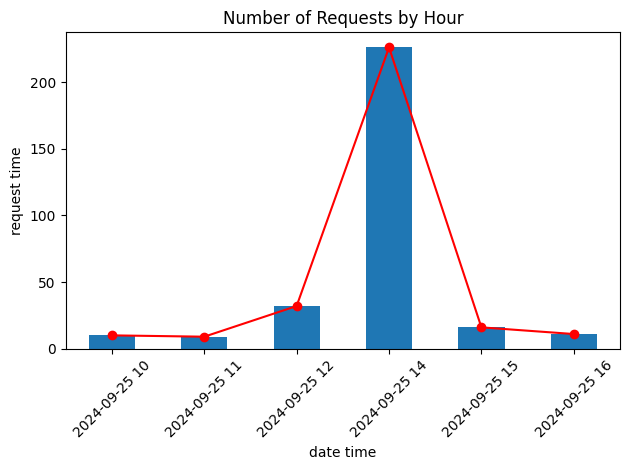

In [150]:
# 데이터 시각화
#plt.figure(figsize=(10, 6))
h_counts.plot(kind='bar')
h_counts.plot(kind='line', color='red', marker='o')
plt.title('Number of Requests by Hour')
plt.xlabel('date time')
plt.ylabel('request time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 스트리밋 출력
#st.pyplot(plt)

In [178]:
# 시간별 그룹화를 위해 'request_time'의 시간(H) 부분 추출
df['h_time'] = df['request_time'].dt.strftime('%Y-%m-%d %H')
df['n_model'] = df['prediction_model'].str.contains(r'n[0-9]', regex=True)
# 시간별 요청 횟수 그룹화
h_counts = df.groupby(['h_time', 'n_model']).size()
#h_counts = df.groupby('n_model').size()
h_counts

h_time         n_model
2024-09-25 10  False        5
               True         5
2024-09-25 11  False        2
               True         7
2024-09-25 12  False       15
               True        17
2024-09-25 14  False      144
               True        82
2024-09-25 15  False        8
               True         8
2024-09-25 16  False        7
               True         4
dtype: int64

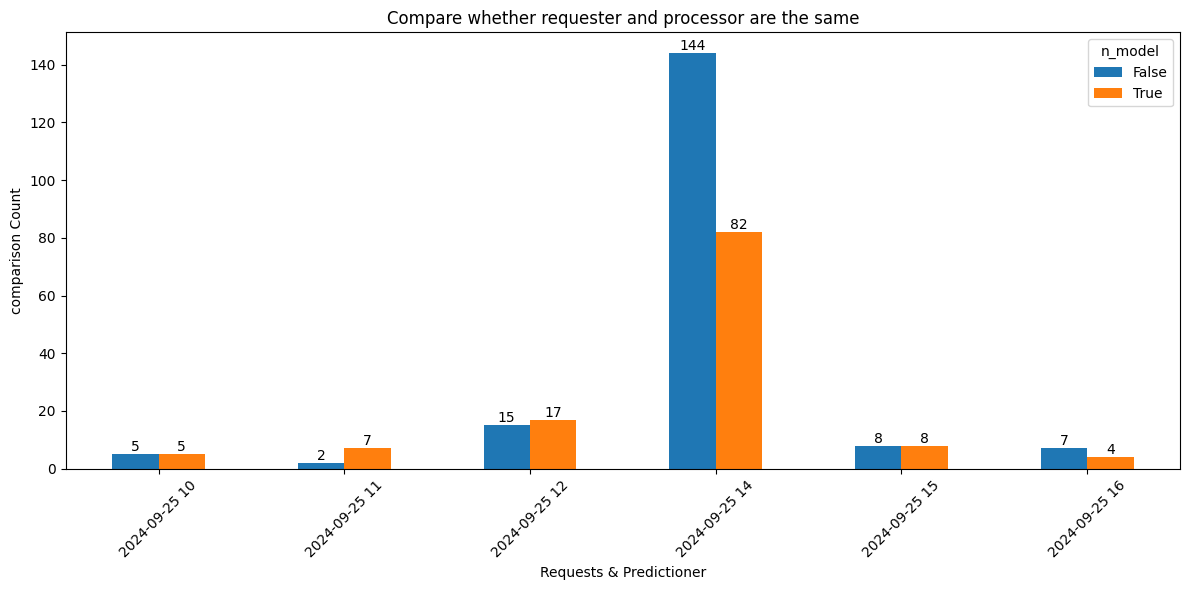

In [195]:
# 데이터 시각화
#plt.figure(figsize=(10, 6))

# 멀티인덱스를 unstack()으로 풀어서 막대그래프 형식에 맞게 변환
grouped_counts_unstacked = h_counts.unstack(fill_value=0)

# 그래프 그리기
ax = grouped_counts_unstacked.plot(kind='bar', figsize=(12, 6))

# 그래프 위에 카운터 숫자 출력
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, 
                color='black', 
                rotation=0)

#h_counts.plot(kind='bar')
#h_counts.plot(kind='line', color='red', marker='o')
plt.title('Compare whether requester and processor are the same')
plt.xlabel('Requests & Predictioner')
plt.ylabel('comparison Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 스트리밋 출력
#st.pyplot(plt)

In [176]:
# prediction_model에서 n 0~9 문자가 포함된 데이터만 추출
df['n_model'] = df['prediction_model'].str.contains(r'n[0-9]', regex=True)
#n_counts = df.groupby('n_model').size()
#n_counts = df.groupby('n_model').size()
#n_counts
n_df = df[df['n_model']]
n_df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time,h_time,n_model,is_same
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01,2024-09-25 10,True,False
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02,2024-09-25 10,True,False
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02,2024-09-25 10,True,False
7,8,001.png,,/home/ubuntu/images/n08/64f807e9-1fc6-412f-9d3...,2024-09-25 10:35:12,n08,n01,1,2024-09-25 10:36:01,2024-09-25 10,True,False
8,9,001.png,,/home/ubuntu/images/n08/0ce10895-8149-48bc-b51...,2024-09-25 10:35:12,n08,n77,6,2024-09-25 10:36:02,2024-09-25 10,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
292,296,9.png,9,/home/ubuntu/images/n07/fbc02423-ee3b-4f2a-a89...,2024-09-25 15:59:47,n07,n07,9,2024-09-25 15:59:57,2024-09-25 15,True,True
294,298,1.jpeg,1,/home/ubuntu/images/n23/eb3a3452-798a-4826-bbc...,2024-09-25 16:55:27,n23,n04,1,2024-09-25 16:56:17,2024-09-25 16,True,False
295,299,1.jpeg,1,/home/ubuntu/images/n23/6f2c0bd7-ec4d-409e-8db...,2024-09-25 16:55:27,n23,n23,0,2024-09-25 16:56:13,2024-09-25 16,True,True
297,301,1.jpeg,1,/home/ubuntu/images/n23/69b9e5d6-a8b6-48b7-ae3...,2024-09-25 16:56:40,n23,n04,1,2024-09-25 16:57:36,2024-09-25 16,True,False


In [152]:
df['is_same'] = df['request_user'] == df['prediction_model']
df['is_same']


0      False
1      False
2      False
3      False
4      False
       ...  
299    False
300    False
301    False
302    False
303    False
Name: is_same, Length: 304, dtype: bool

In [153]:
same_counts = df['is_same'].value_counts()
same_counts

is_same
False    274
True      30
Name: count, dtype: int64

In [154]:
import numpy as np

labels = ['Same', 'Different']
counts1 = same_counts[True]
counts2 = same_counts[False]
counts1


np.int64(30)

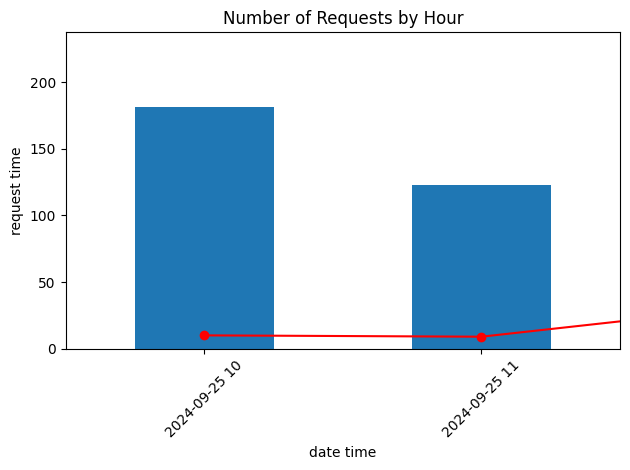

In [171]:
#h_counts.plot(kind='bar')
nm_counts.plot(kind='bar')
h_counts.plot(kind='line', color='red', marker='o')
plt.title('Number of Requests by Hour')
plt.xlabel('date time')
plt.ylabel('request time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()












In [ ]:

# 막대그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.4
index = np.arange(len(labels))

# 각각의 막대 그래프를 그리기
ax.bar(index, counts, bar_width, label='Request vs Prediction')

# 그래프 설정
ax.set_xlabel('Comparison')
ax.set_ylabel('Count')
ax.set_title('Request User vs Prediction Model')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


In [ ]:
# 데이터 시각화
#plt.figure(figsize=(10, 6))
h_counts.plot(kind='bar')
h_counts.plot(kind='line', color='red', marker='o')
plt.title('Number of Requests by Hour')
plt.xlabel('date time')
plt.ylabel('request time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
